In [75]:
!pip install opencv-python

In [76]:
import cv2
import numpy as np

In [95]:
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    return image

In [96]:
def random_sample_pixels(image, sample_size=625):
    height, width, _ = image.shape
    indices = np.random.choice(height * width, size=sample_size, replace=False)
    sampled_pixels = np.array([image[idx // width, idx % width] for idx in indices])
    return sampled_pixels

In [97]:
def count_pixels_per_color_region(sampled_pixels, colorspace_divisions=8): #8):
    color_counts = np.zeros((colorspace_divisions, colorspace_divisions, colorspace_divisions))
    bins = np.linspace(0, 256, colorspace_divisions)
    
    for pixel in sampled_pixels:
        r, g, b = pixel.astype(int)
        
        color_counts[np.digitize(r, bins),
                     np.digitize(g, bins),
                     np.digitize(b, bins)] += 1

    return color_counts.flatten()

# Sample image

In [98]:
image_path = '../style_embedding/examples/inputs/brad_pitt.jpg'

# Step 1: Load image

In [99]:
image = load_and_preprocess_image(image_path)

# Step 2: Random sample 625 pixels

In [100]:
sampled_pixels = random_sample_pixels(image)

# Step 3: Count pixel counts per color region

In [101]:
color_counts = count_pixels_per_color_region(sampled_pixels)

# Results

In [102]:
print("Sampled Pixels:\n", sampled_pixels)
print("\nColor Counts per Color Region:\n", color_counts)
print("\nTotal Color Counts:", np.sum(color_counts))
print("\nTotal non-zero Color Counts:", np.sum(color_counts > 0))
print("Percent of non-zero Color Counts:", np.sum(color_counts > 0) / len(color_counts) * 100, "%")

Sampled Pixels:
 [[126 114 124]
 [ 33  34  46]
 [218 224 220]
 ...
 [253 205 172]
 [225 151 113]
 [ 20   1   4]]

Color Counts per Color Region:
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  36.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   9.   2.   0.
   0.   0.   0.   0.   0.   2.  20.   2.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  

In [103]:
for i in range(2, 9):
    color_counts = count_pixels_per_color_region(sampled_pixels, colorspace_divisions=i)
    # print("\nColor Counts per Color Region ({} divisions):\n".format(i), color_counts)
    # print("\nTotal Color Counts:", np.sum(color_counts))
    print("\nTotal non-zero Color Counts:", np.sum(color_counts > 0))
    print("Percent of non-zero Color Counts:", np.sum(color_counts > 0) / len(color_counts) * 100, "%")
    


Total non-zero Color Counts: 1
Percent of non-zero Color Counts: 12.5 %

Total non-zero Color Counts: 7
Percent of non-zero Color Counts: 25.925925925925924 %

Total non-zero Color Counts: 12
Percent of non-zero Color Counts: 18.75 %

Total non-zero Color Counts: 20
Percent of non-zero Color Counts: 16.0 %

Total non-zero Color Counts: 25
Percent of non-zero Color Counts: 11.574074074074074 %

Total non-zero Color Counts: 38
Percent of non-zero Color Counts: 11.078717201166182 %

Total non-zero Color Counts: 47
Percent of non-zero Color Counts: 9.1796875 %


## Umap

### More samples



In [115]:
from glob import glob
from sklearn.preprocessing import normalize


def image_to_color_code(image_path, sample_size=625, colorspace_divisions=4): #8):
    image = load_and_preprocess_image(image_path)
    sampled_pixels = random_sample_pixels(image, sample_size)
    return count_pixels_per_color_region(sampled_pixels, colorspace_divisions)

# example_color_codes = normalize(np.array([image_to_color_code(path) for path in glob('../style_embedding/examples/inputs/*')]))
example_color_codes = np.array([image_to_color_code(path) for path in glob('../style_embedding/examples/inputs/*')]))

example_color_codes

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.39640078, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.46534004, 0.        , 0.        ,
        0.        , 0.28437447, 0.11633501, 0.        , 0.        ,
        0.        , 0.0043087 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01723482, 0.        ,
        0.        , 0.        , 0.44379652, 0.15942205, 0.        ,
        0.        , 0.05170445, 0.48257486, 0.27144836],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0. 

In [157]:
from umap import UMAP

umap = UMAP(n_components=3, metric='cosine', random_state=42)

umapped = umap.fit_transform(example_color_codes)
umapped_min = np.min(umapped, axis=0)
umapped_max = np.max(umapped, axis=0)

normalized_umapped = (umapped - umapped_min) / (umapped_max - umapped_min)

std_per_column = np.std(normalized_umapped, axis=0)
mean_per_column = np.mean(normalized_umapped, axis=0)

/home/pawel/Documents/studia/sem9/IWISUM/artsygest/venv/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/pawel/Documents/studia/sem9/IWISUM/artsygest/venv/lib/python3.11/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [156]:
std_per_column

array([0.3203498 , 0.29245937, 0.30320203], dtype=float32)

In [158]:
mean_per_column

array([0.4814408 , 0.45478484, 0.47726604], dtype=float32)

In [152]:
import matplotlib.pyplot as plt

def draw_umap_with_labels(umap_embeddings, title=''):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], umap_embeddings[:, 2])
    ax.set_title(title, fontsize=14)
    # plt.savefig(title + '.png')
    plt.show()

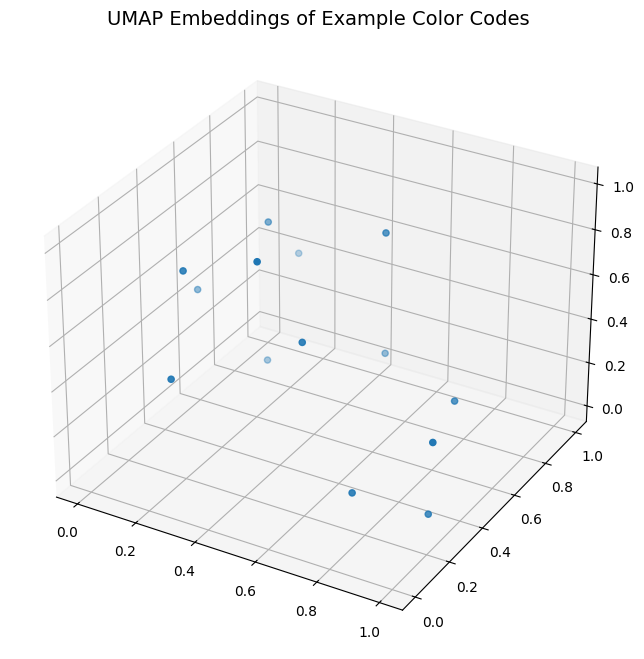

In [154]:
draw_umap_with_labels(normalized_umapped, title='UMAP Embeddings of Example Color Codes')